<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/makinggraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

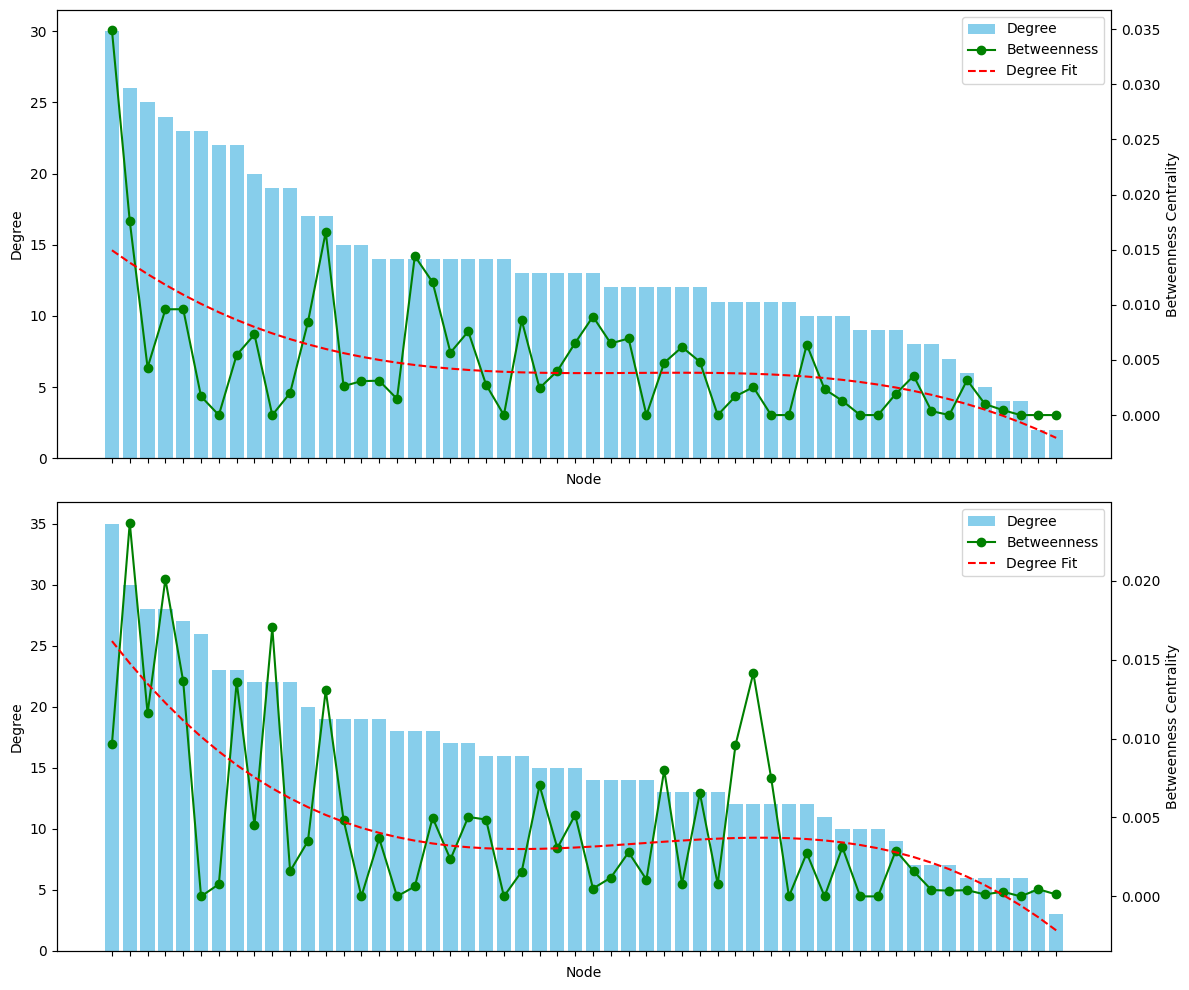

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io

# --- 数据准备 ---

# Morning Peak Data
morning_data = """Node,Degree,In_Degree,Out_Degree,Betweenness
Stockholm Odenplan,30,14,16,0.034897
Krigslida,26,17,9,0.017588
Årstaberg,17,10,7,0.016606
Stockholms södra,14,9,5,0.014421
Handen,14,12,2,0.012048
Norrviken,23,8,15,0.009604
Upplands Väsby,24,4,20,0.009594
Stockholm City,13,6,7,0.008934
Spånga,13,4,9,0.008598
Ulriksdal,17,5,12,0.008431
Stuvsta,14,6,8,0.007587
Solna,20,7,13,0.007310
Trångsund,12,8,4,0.006946
Älvsjö,13,9,4,0.006543
Tumba,12,8,4,0.006499
Huddinge,10,7,3,0.006396
Vega,12,7,5,0.006168
Jordbro,14,11,3,0.005666
Kallhäll,22,5,17,0.005447
Hemfosa,12,8,4,0.004836
Häggvik,12,5,7,0.004750
Nynäsgård,25,22,3,0.004308
Arlanda central,13,3,10,0.003999
Västerhaninge,8,4,4,0.003558
Helenelund,6,4,2,0.003175
Jakobsberg,14,2,12,0.003118
Rönninge,15,12,3,0.003078
Flemingsberg,14,10,4,0.002752
Ösmo,15,13,2,0.002625
Tullinge,11,8,3,0.002534
Bro,13,1,12,0.002447
Sundbyberg,10,5,5,0.002353
Tungelsta,19,13,6,0.002002
Rotebro,9,2,7,0.001927
Skogås,11,5,6,0.001703
Kungsängen,23,2,21,0.001693
Segersäng,14,12,2,0.001470
Barkarby,10,4,6,0.001291
Gröndalsviken,5,4,1,0.000998
Farsta strand,4,3,1,0.000454
Mölnbo,8,2,6,0.000363
Uppsala C,11,0,11,0.000000
Sollentuna,9,1,8,0.000000
Bålsta,11,0,11,0.000000
Knivsta,9,1,8,0.000000
Rosersberg,19,0,19,0.000000
Märsta,7,0,7,0.000000
Gnesta,2,0,2,0.000000
Järna,2,1,1,0.000000
Nynäshamn,22,20,2,0.000000
Södertälje centrum,4,4,0,0.000000
Södertälje hamn,14,14,0,0.000000
Södertälje syd,12,9,3,0.000000
Östertälje,11,11,0,0.000000
"""

# Evening Peak Data
evening_data = """Node,Degree,In_Degree,Out_Degree,Betweenness
Ulriksdal,30,10,20,0.023659
Årstaberg,28,12,16,0.020109
Stockholm City,22,8,14,0.017037
Farsta strand,12,7,5,0.014138
Stockholms södra,27,14,13,0.013614
Helenelund,23,8,15,0.013596
Stockholm Odenplan,19,11,8,0.013062
Älvsjö,28,15,13,0.011599
Upplands Väsby,35,8,27,0.009667
Barkarby,12,5,7,0.009585
Spånga,13,3,10,0.008004
Häggvik,12,6,6,0.007514
Sundbyberg,15,5,10,0.007033
Jordbro,13,10,3,0.006540
Sollentuna,15,6,9,0.005156
Jakobsberg,17,1,16,0.005032
Ösmo,18,14,4,0.004981
Solna,16,9,7,0.004866
Stuvsta,19,10,9,0.004843
Rotebro,22,5,17,0.004506
Huddinge,19,11,8,0.003673
Flemingsberg,20,16,4,0.003494
Skogås,10,6,4,0.003112
Norrviken,15,2,13,0.003063
Tumba,9,7,2,0.002904
Södertälje hamn,14,13,1,0.002794
Handen,12,9,3,0.002743
Rönninge,17,15,2,0.002346
Rosersberg,22,3,19,0.001597
Vega,7,4,3,0.001588
Tullinge,16,12,4,0.001573
Krigslida,14,6,8,0.001185
Hemfosa,14,8,6,0.001064
Tungelsta,13,6,7,0.000779
Segersäng,13,8,5,0.000779
Nynäsgård,23,20,3,0.000772
Gröndalsviken,18,16,2,0.000629
Knivsta,14,2,12,0.000496
Kungsängen,5,1,4,0.000455
Kallhäll,7,2,5,0.000403
Trångsund multiplets,6,4,2,0.000395
Arlanda central,7,2,5,0.000363
Södertälje syd,6,4,2,0.000302
Järna,3,2,1,0.000121
Mölnbo,6,2,4,0.000121
Uppsala C,18,0,18,0.000000
Märsta,16,1,15,0.000000
Bro,12,2,10,0.000000
Bålsta,10,1,9,0.000000
Gnesta,6,0,6,0.000000
Nynäshamn,26,26,0,0.000000
Södertälje centrum,10,10,0,0.000000
Västerhaninge,11,10,1,0.000000
Östertälje,19,19,0,0.000000
"""

# Read data into pandas DataFrames
df_morning = pd.read_csv(io.StringIO(morning_data))
df_evening = pd.read_csv(io.StringIO(evening_data))


# --- Plotting Function ---

def plot_data(ax, df, title):
    """
    Plots the degree and betweenness centrality for a given dataframe on a specific axes.

    ax: The matplotlib axes object to plot on.
    df: The pandas DataFrame containing the data.
    title: The title for the subplot.
    """
    # Sort dataframe by Degree in descending order
    df_sorted = df.sort_values(by='Degree', ascending=False)

    # --- Prepare data for polynomial fit ---
    x_values = np.arange(len(df_sorted))
    y_values = df_sorted['Betweenness'].values
    poly_degree = 3

    # Calculate polynomial fit coefficients
    coeffs = np.polyfit(x_values, y_values, poly_degree)
    p = np.poly1d(coeffs)
    y_fit = p(x_values)

    # --- Plotting ---

    # Bar plot for Degree
    ax.bar(df_sorted['Node'].astype(str), df_sorted['Degree'], color='skyblue', label='Degree')
    ax.set_ylabel('Degree', color='black')
    ax.tick_params(axis='y', labelcolor='black')
    ax.set_xticklabels([]) # Hide x-axis labels to avoid clutter
    ax.set_xlabel('Node')

    # Create a second y-axis for Betweenness Centrality
    ax_twin = ax.twinx()

    # Line plot for Betweenness
    ax_twin.plot(df_sorted['Node'].astype(str), df_sorted['Betweenness'], color='green', marker='o', linestyle='-', label='Betweenness')

    # Plot polynomial fit
    ax_twin.plot(x_values, y_fit, color='red', linestyle='--', label=f'Degree Fit')

    ax_twin.set_ylabel('Betweenness Centrality', color='black')
    ax_twin.tick_params(axis='y', labelcolor='black')

    # Set plot title
    # ax.set_title(title)

    # Combine legends from both axes
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax_twin.get_legend_handles_labels()
    ax_twin.legend(lines + lines2, labels + labels2, loc=0)


# --- Create the Figure and Subplots ---

# Create a figure with 2 rows, 1 column of subplots, with a specific total size
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot morning data on the top subplot
plot_data(ax1, df_morning, 'Morning Peak')

# Plot evening data on the bottom subplot
plot_data(ax2, df_evening, 'Evening Peak')

# Adjust layout to prevent titles and labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()

/tmp/ipython-input-3885027736.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(motif_names_morning, rotation=45)
/tmp/ipython-input-3885027736.py:44: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(motif_names_evening, rotation=45)


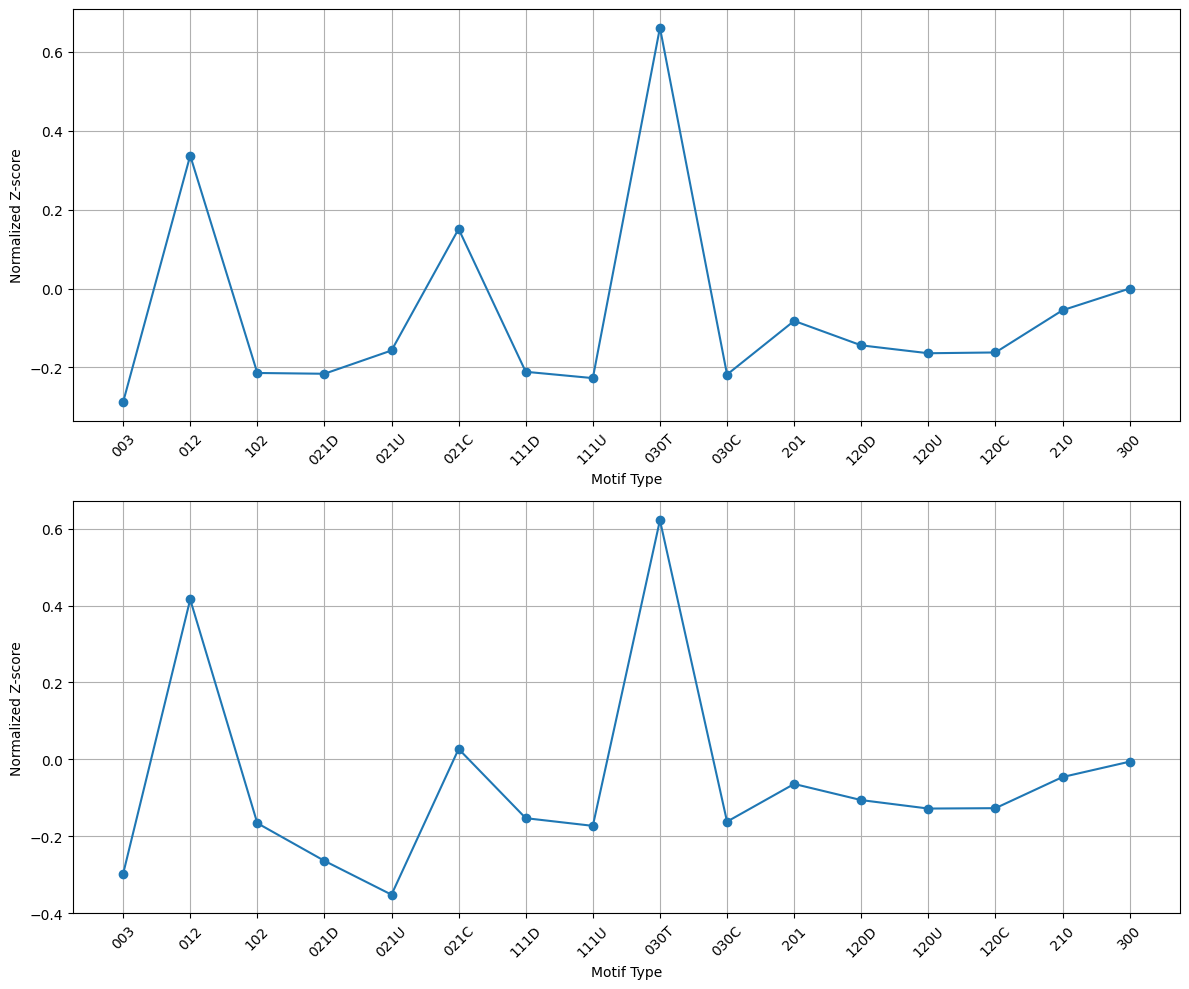

In [4]:
import matplotlib.pyplot as plt

# --- 数据准备 ---

# 新数据 (用于上方的图) - Morning Peak
motif_names_morning = [
    '003', '012', '102', '021D', '021U', '021C',
    '111D', '111U', '030T', '030C', '201', '120D',
    '120U', '120C', '210', '300'
]
z_norm_morning = [
    -0.288, 0.337, -0.214, -0.216, -0.157, 0.151,
    -0.211, -0.227, 0.661, -0.218, -0.082, -0.144,
    -0.164, -0.162, -0.055, 0.000
]

# 旧数据 (用于下方的图) - Evening Peak
motif_names_evening = [
    '003', '012', '102', '021D', '021U', '021C',
    '111D', '111U', '030T', '030C', '201', '120D',
    '120U', '120C', '210', '300'
]
z_norm_evening = [
    -0.298, 0.416, -0.166, -0.264, -0.352, 0.027,
    -0.153, -0.173, 0.622, -0.162, -0.064, -0.106,
    -0.128, -0.127, -0.046, -0.006
]

# --- 绘图 ---

# 创建一个包含2行1列子图的画布，设置整体尺寸
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# --- 绘制上方的图 (Morning Peak) ---
ax1.plot(motif_names_morning, z_norm_morning, marker='o', linestyle='-')
ax1.set_xticklabels(motif_names_morning, rotation=45)
ax1.set_xlabel("Motif Type")
ax1.set_ylabel("Normalized Z-score")
# ax1.set_title("Triad Significance Profile (TSP) - Morning Peak")
ax1.grid(True)

# --- 绘制下方的图 (Evening Peak) ---
ax2.plot(motif_names_evening, z_norm_evening, marker='o', linestyle='-')
ax2.set_xticklabels(motif_names_evening, rotation=45)
ax2.set_xlabel("Motif Type")
ax2.set_ylabel("Normalized Z-score")
# ax2.set_title("Triad Significance Profile (TSP) - Evening Peak")
ax2.grid(True)

# 自动调整布局，防止标签和标题重叠
plt.tight_layout()

# 显示图像
plt.show()